<a href="https://colab.research.google.com/github/ankitmavani/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("drive/MyDrive/AlmaBetter/Bike Sharing/SeoulBikeData.csv",encoding= 'unicode_escape')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df[df.duplicated()].shape

(0, 14)

In [9]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [10]:
print("Seasons Dataset : ",df["Seasons"].unique())
print("Holiday Dataset : ",df["Holiday"].unique())
print("Functioning Days Dataset : ",df["Functioning Day"].unique())

Seasons Dataset :  ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday Dataset :  ['No Holiday' 'Holiday']
Functioning Days Dataset :  ['Yes' 'No']


### **Rented Bike Count**

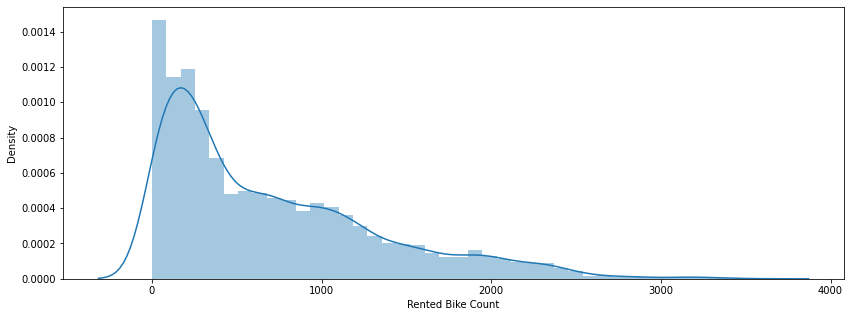

In [24]:
plt.figure(figsize=(14,5))
sns.distplot(df["Rented Bike Count"])

### **Hour**

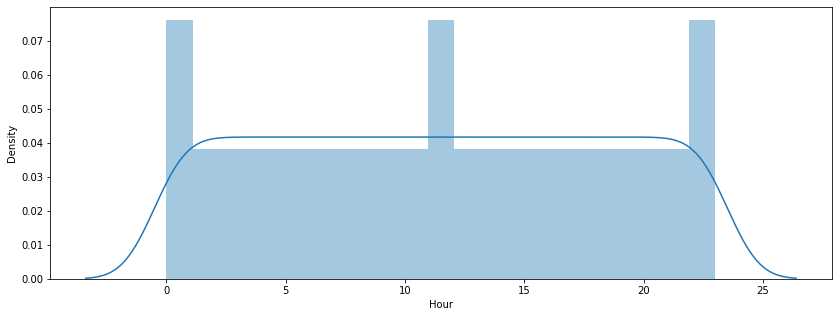

In [28]:
plt.figure(figsize=(14,5))
sns.distplot(df["Hour"])

In [26]:
df["Hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

### **temperature**

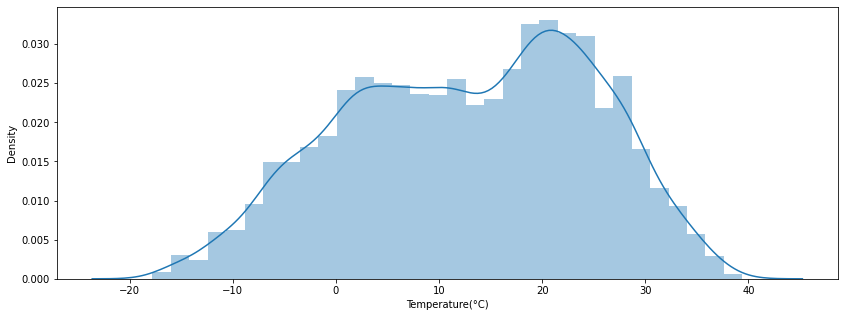

In [29]:
plt.figure(figsize=(14,5))
sns.distplot(df["Temperature(°C)"])

### **Humidity**

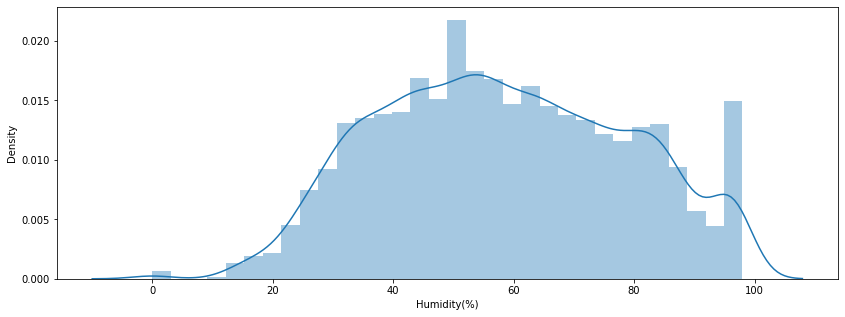

In [30]:
plt.figure(figsize=(14,5))
sns.distplot(df["Humidity(%)"])

### **Wind speed**

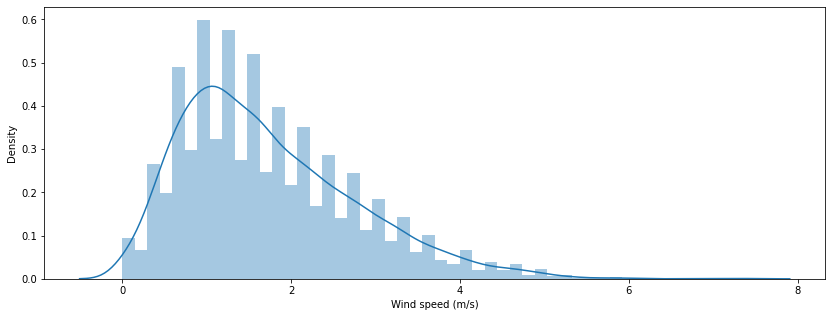

In [32]:
plt.figure(figsize=(14,5))
sns.distplot(df["Wind speed (m/s)"])

### **Visibility**

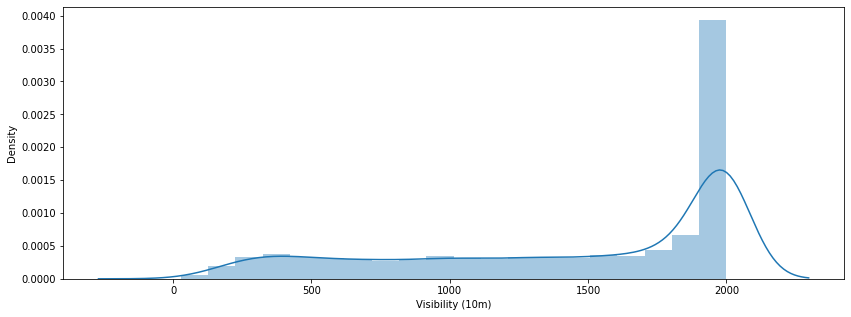

In [37]:
plt.figure(figsize=(14,5))
sns.distplot(df["Visibility (10m)"])

### **Dew Point**

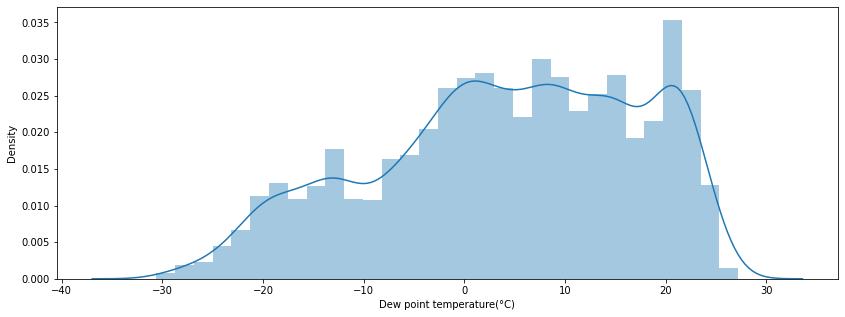

In [36]:
plt.figure(figsize=(14,5))
sns.distplot(df["Dew point temperature(°C)"])

### **Solar Radiation**

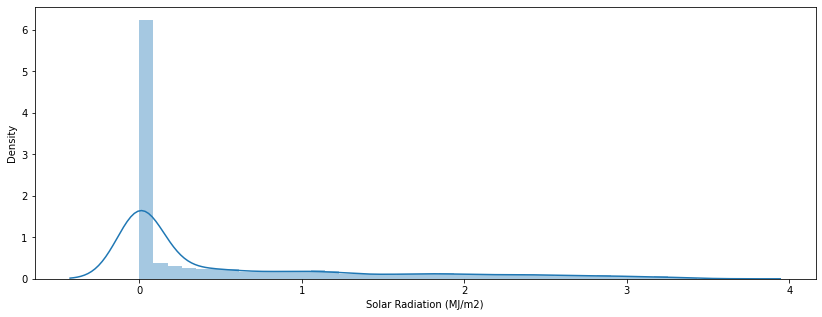

In [35]:
plt.figure(figsize=(14,5))
sns.distplot(df["Solar Radiation (MJ/m2)"])

### **RainFall**

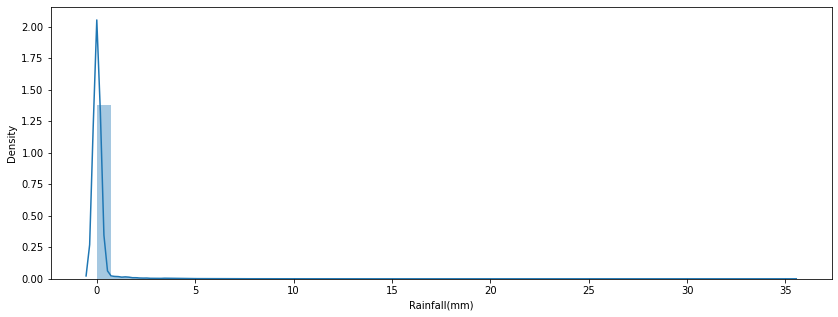

In [34]:
plt.figure(figsize=(14,5))
sns.distplot(df["Rainfall(mm)"])

### **snowFall**

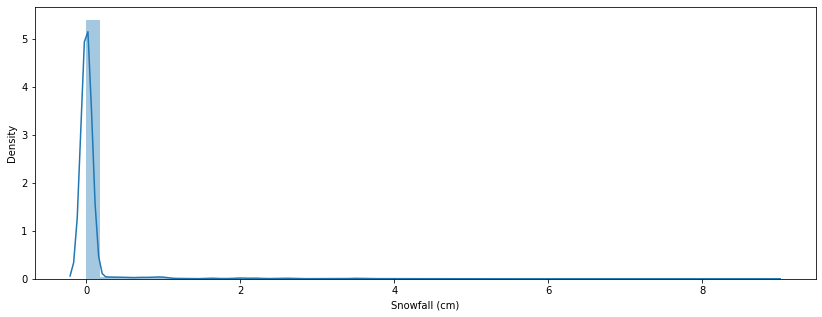

In [33]:
plt.figure(figsize=(14,5))
sns.distplot(df["Snowfall (cm)"])

### **Holiday**

,Number_Of_Data,Percentage_Of_Data
No Holiday,8328.0,95.068493
Holiday,432.0,4.931507


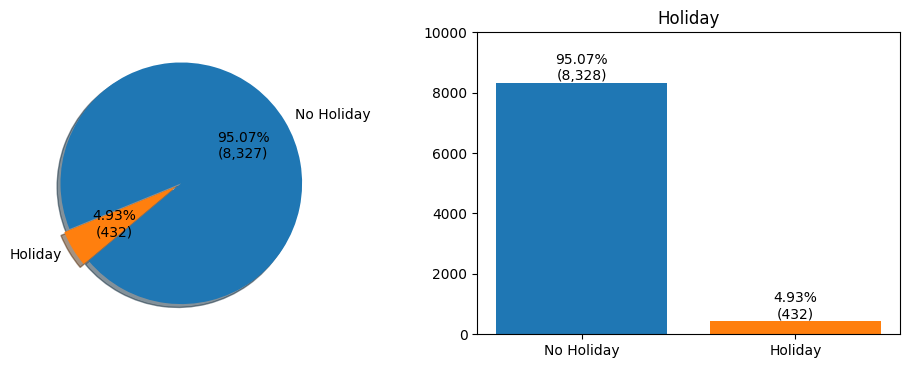

In [40]:
count_data = pd.DataFrame([df["Holiday"].value_counts(),df["Holiday"].value_counts(normalize=True)*100]).T
count_data.columns = ["Number_Of_Data", "Percentage_Of_Data"]

display(count_data)

fig, ax = plt.subplots(1,2,figsize= (12, 4), dpi = 100)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

explode = (0, 0.05)

ax[0].pie(
    df["Holiday"].value_counts(), 
    labels = ["No Holiday","Holiday"], 
    autopct = lambda pct : func(pct,df["Holiday"].value_counts()), 
    shadow = True,
    startangle = 220, 
    explode = explode,
    textprops=dict(color='black')
)

plt.title("Holiday")

def func1(height):
    total = len(df["Holiday"])
    pct =((height * 100)/total).round(2)
    return "{:.2f}%\n({:,})".format(pct, height)

g = ax[1].bar(df["Holiday"].value_counts().index,df["Holiday"].value_counts(),color=["#1f77b4","#ff7f0e"])

for rect in g:
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2.0, height,func1(height),ha='center', va='bottom')

plt.ylim((0,10000))
    
plt.title("Holiday")

plt.show()

### **Functioning Day**

,Number_Of_Data,Percentage_Of_Data
Yes,8465.0,96.63242
No,295.0,3.36758


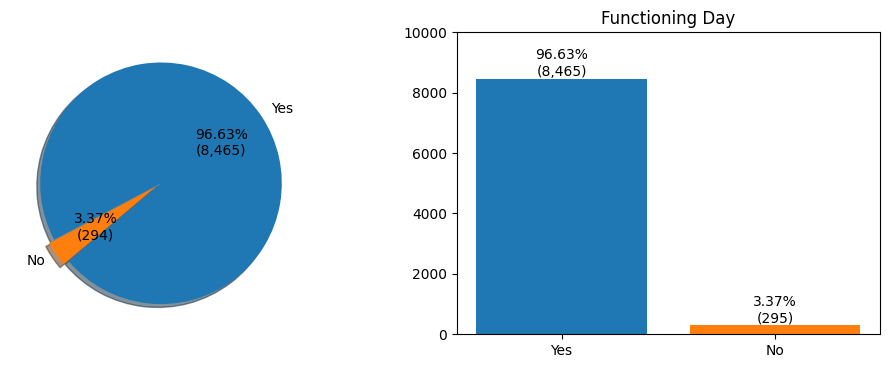

In [41]:
count_data = pd.DataFrame([df["Functioning Day"].value_counts(),df["Functioning Day"].value_counts(normalize=True)*100]).T
count_data.columns = ["Number_Of_Data", "Percentage_Of_Data"]

display(count_data)

fig, ax = plt.subplots(1,2,figsize= (12, 4), dpi = 100)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

explode = (0, 0.05)

ax[0].pie(
    df["Functioning Day"].value_counts(), 
    labels = ["Yes","No"], 
    autopct = lambda pct : func(pct,df["Functioning Day"].value_counts()), 
    shadow = True,
    startangle = 220, 
    explode = explode,
    textprops=dict(color='black')
)

plt.title("Functioning Day")

def func1(height):
    total = len(df["Functioning Day"])
    pct =((height * 100)/total).round(2)
    return "{:.2f}%\n({:,})".format(pct, height)

g = ax[1].bar(df["Functioning Day"].value_counts().index,df["Functioning Day"].value_counts(),color=["#1f77b4","#ff7f0e"])

for rect in g:
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2.0, height,func1(height),ha='center', va='bottom')

plt.ylim((0,10000))
    
plt.title("Functioning Day")

plt.show()

### **Seasons**

,Number_Of_Data,Percentage_Of_Data
Spring,2208.0,25.205479
Summer,2208.0,25.205479
Autumn,2184.0,24.931507
Winter,2160.0,24.657534


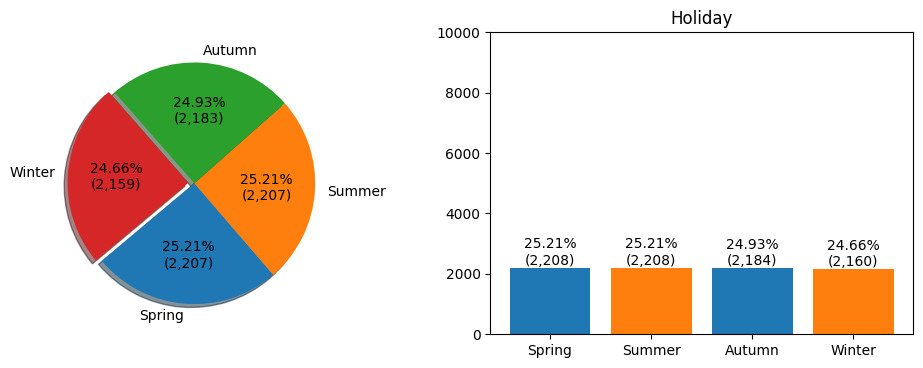

In [44]:
count_data = pd.DataFrame([df["Seasons"].value_counts(),df["Seasons"].value_counts(normalize=True)*100]).T
count_data.columns = ["Number_Of_Data", "Percentage_Of_Data"]

display(count_data)

fig, ax = plt.subplots(1,2,figsize= (12, 4), dpi = 100)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

explode = (0, 0,0,0.05)

ax[0].pie(
    df["Seasons"].value_counts(), 
    labels = ["Spring","Summer","Autumn","Winter"], 
    autopct = lambda pct : func(pct,df["Seasons"].value_counts()), 
    shadow = True,
    startangle = 220, 
    explode = explode,
    textprops=dict(color='black')
)

plt.title("Seasons")

def func1(height):
    total = len(df["Seasons"])
    pct =((height * 100)/total).round(2)
    return "{:.2f}%\n({:,})".format(pct, height)

g = ax[1].bar(df["Seasons"].value_counts().index,df["Seasons"].value_counts(),color=["#1f77b4","#ff7f0e"])

for rect in g:
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2.0, height,func1(height),ha='center', va='bottom')

plt.ylim((0,10000))
    
plt.title("Holiday")

plt.show()

## Feature Engineering

In [22]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [23]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
